<a href="https://colab.research.google.com/github/MayankDw/store_locator/blob/main/store_single-0309_errorfix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
addr = []
urls = [ "https://stores.footlocker.com/mi/annarbor"
,"https://stores.footlocker.com/mi/auburnhills"
,"https://stores.footlocker.com/mi/dearborn"
,"https://stores.footlocker.com/mi/detroit"
,"https://stores.footlocker.com/mi/eastpointe"
,"https://stores.footlocker.com/mi/flint"
,"https://stores.footlocker.com/mi/grandrapids"
,"https://stores.footlocker.com/mi/grandville"
,"https://stores.footlocker.com/mi/harperwoods"
,"https://stores.footlocker.com/mi/highlandpark"
,"https://stores.footlocker.com/mi/lansing"
,"https://stores.footlocker.com/mi/muskegon"
,"https://stores.footlocker.com/mi/novi"
,"https://stores.footlocker.com/mi/oakpark"
,"https://stores.footlocker.com/mi/okemos"
,"https://stores.footlocker.com/mi/portage"
,"https://stores.footlocker.com/mi/redford"
,"https://stores.footlocker.com/mi/roseville"
,"https://stores.footlocker.com/mi/shelbytownship"
,"https://stores.footlocker.com/mi/southfield"
,"https://stores.footlocker.com/mi/taylor"
,"https://stores.footlocker.com/mi/troy"
,"https://stores.footlocker.com/mi/westland"
       ]
# get html content from url
for url in urls:
    html_content = requests.get(url).text
    # parse the content
    soup = BeautifulSoup(html_content, 'lxml')
    #print(soup.prettify()) #print the parsed data
    #soup.prettify()
    if soup.find("div", attrs = {'class':'address'}) is not None:
         table = [soup.find("div", attrs = {'class':'address'}).get_text()]

    for x in table:
        addr.append(x.strip().replace('\n', ''))

print(addr)


['672 Briarwood Circle Ann Arbor, MI 48108', '4186 Baldwin Road Suite 336Auburn Hills, MI 48326', '18900 Michigan Avenue Space M-124Dearborn, MI 48126', '14296 Gratiot Avenue Detroit, MI 48205', '15015 East 8 Mile Road Eastpointe, MI 48021', '15015 East 8 Mile Road Eastpointe, MI 48021', '3115 28th Street Southeast Space F-104Grand Rapids, MI 49512', '3700 Rivertown Parkway Space 1204Grandville, MI 49418', '17755 East Eight Mile Road Harper Woods, MI 48225', '14108 Woodward Avenue Highland Park, MI 48203', '5356 West Saginaw Highway Lansing, MI 48917', '5356 West Saginaw Highway Lansing, MI 48917', '27694 Novi Road Novi, MI 48377', '21230 Greenfield Rd Oak Park, MI 48237', '1982 West Grand River Avenue Space 553Okemos, MI 48864', '6650 South Westnedge Avenue Space 142Portage, MI 49024', '9189 Telegraph Road Redford, MI 48239', '32401 Gratiot Avenue Roseville, MI 48066', '13825 Hall Road Shelby Township, MI 48315', '28670 Telegraph Road Southfield, MI 48034', '23000 Eureka Road Space 16

In [2]:
import geopy
import folium
addr = ['672 Briarwood Circle Ann Arbor, MI 48108', '4186 Baldwin Rd Auburn Hills, MI 48326', '18900 Michigan Ave Dearborn, MI 48126',
        '1351 West 8 Mile Rd Detroit, MI 48203', '15015 East 8 Mile Rd Eastpointe, MI 48021', '3445 S Linden Rd, Flint, MI 48507',
        '3115 28th St SE, Kentwood, MI 49512', '3700 Rivertown Parkway Grandville, MI 49418', '17755 East 8 Mile Rd Harper Woods, MI 48225',
        '14108 Woodward Ave Highland Park, MI 48203', '5356 West Saginaw Highway Lansing, MI 48917', '5600 Harvey St Muskegon, MI 49444',
        '27694 Novi Rd Novi, MI 48377', '21230 Greenfield Rd Oak Park, MI 48237', '1982 W Grand River Ave Okemos, MI 48864',
        '6650 South Westnedge Ave Portage, MI 49024', '9189 Telegraph Rd, Redford, MI 48239', '32401 Gratiot Ave Roseville, MI 48066',
        '13825 Hall Rd Shelby Township, MI 48315', '28670 Telegraph Rd, Southfield, MI 48034', '23000 Eureka Rd, Taylor, MI 48180',
        '362 W 14 Mile Rd Troy, MI 48083', '35000 Warren Rd Westland, MI 48185']

object = geopy.Nominatim(user_agent = 'store_single')

def get_geodata(address):
    try:
        return object.geocode(address)
    except:
        return None
store_geodata = {}
incorrect_addr = []
cent_loc = 'Lansing, MI'
center = get_geodata(cent_loc)
if center is not None:
    map1 = folium.Map(location= [center.latitude, center.longitude], zoom_start=7)
    folium.Marker([center.latitude, center.longitude], popup='center store',
                  icon=folium.Icon(color="red", icon="star")).add_to(map1)
else:
    print('The Map location is incorrect, cannot draw map')

for location in addr:
    geodata = get_geodata(location)
    if geodata is not None:
        folium.Marker([geodata.latitude, geodata.longitude], draggble=True,
                      icon=folium.Icon(color="blue")).add_to(map1)
        store_geodata[location] = [geodata.latitude, geodata.longitude]
    else:
        incorrect_addr.append(location)
if len(incorrect_addr) != 0:
    print('These addresses are incorrect:', incorrect_addr)

print(store_geodata)

map1

These addresses are incorrect: ['13825 Hall Rd Shelby Township, MI 48315', '28670 Telegraph Rd, Southfield, MI 48034', '23000 Eureka Rd, Taylor, MI 48180']
{'672 Briarwood Circle Ann Arbor, MI 48108': [42.241050200000004, -83.74667569600683], '4186 Baldwin Rd Auburn Hills, MI 48326': [42.690368725344726, -83.30537551397458], '18900 Michigan Ave Dearborn, MI 48126': [42.31688655, -83.22296100140477], '1351 West 8 Mile Rd Detroit, MI 48203': [42.44519452516463, -83.18129761363781], '15015 East 8 Mile Rd Eastpointe, MI 48021': [42.450633550000006, -82.96561635], '3445 S Linden Rd, Flint, MI 48507': [43.009302455882434, -83.77287272656855], '3115 28th St SE, Kentwood, MI 49512': [42.912598406947, -85.58991399704016], '3700 Rivertown Parkway Grandville, MI 49418': [42.88218598196104, -85.75789402891908], '17755 East 8 Mile Rd Harper Woods, MI 48225': [42.45018358345881, -82.9387287577088], '14108 Woodward Ave Highland Park, MI 48203': [42.407426243902435, -83.09823846341463], '5356 West Sag

In [3]:
# Apply k means to find the cluster and within cluster., where your store belongs find
# Find K nearest neighbors using Eucledian formula
# Find the sales forecast for that item in the stores
# Make the pool
# max(Available - forecast) is the store to replenish from
# combined graph and individual to show.
# store pick up.

In [17]:
from sklearn import cluster
import numpy as np
import folium
from geopy.distance import great_circle

store_points = np.array(list(store_geodata.values()))

# Assign cluster size and apply kmeans
cluster_size = 4
k_means = cluster.KMeans(n_clusters=cluster_size, random_state = 12)
k_means.fit(store_points)
centers = (k_means.cluster_centers_)
label = k_means.labels_

# Create Folium map centered around the midpoint of points
map_center = [np.mean(store_points[:, 0]), np.mean(store_points[:, 1])]
map1 = folium.Map(location=map_center, zoom_start=10)

# Assign points to clusters and calculate circle radius
for cluster in range(cluster_size):
    cluster_points = store_points[label == cluster]
    center = centers[cluster]
    folium.Marker(location=center.tolist(), popup=f'Cluster {cluster}', icon=folium.Icon(color='red', icon="star")).add_to(map1)

    # Calculate the maximum distance to a point in the cluster
    max_distance = max(great_circle(center, point).meters for point in cluster_points)

    # Draw circle around cluster center covering all cluster points
    folium.Circle(location=center.tolist(), radius=max_distance, color='blue', fill=True, fill_opacity=0.2).add_to(map1)

    # Add cluster points to the map
    for point in cluster_points:
        folium.Marker(location=point.tolist(), icon=folium.Icon(color="green"), fill=True).add_to(map1)

# Save map to HTML file
map1.save("kmeans_clusters_map.html")
map1

In [12]:
p = label
q = p.reshape(-1,1)
print(store_points)
print(p)
print(q)

[[ 42.2410502  -83.7466757 ]
 [ 42.69036873 -83.30537551]
 [ 42.31688655 -83.222961  ]
 [ 42.44519453 -83.18129761]
 [ 42.45063355 -82.96561635]
 [ 43.00930246 -83.77287273]
 [ 42.91259841 -85.589914  ]
 [ 42.88218598 -85.75789403]
 [ 42.45018358 -82.93872876]
 [ 42.40742624 -83.09823846]
 [ 42.74124216 -84.94210826]
 [ 43.150413   -86.20573   ]
 [ 42.49313806 -83.4760107 ]
 [ 42.4494177  -83.20000128]
 [ 42.725729   -84.4186215 ]
 [ 42.22021085 -85.59389362]
 [ 42.36123108 -83.27501438]
 [ 42.49969641 -82.93525973]
 [ 42.53432233 -83.11046057]
 [ 42.3408406  -83.38944002]]
[2 0 0 0 0 3 1 1 0 0 1 1 0 0 3 1 0 0 0 0]
[[2]
 [0]
 [0]
 [0]
 [0]
 [3]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [3]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#  Coordinates (latitude, longitude) of stores
X = store_points
# Corresponding clusters
yi = label
y = yi.reshape(-1,1)
# np.array([centers[label[x]] for x in range(len(store_points))])

# New data point to classify
#new_point = np.array([[39.9042, 116.4074]]) # Beijing

def get_geodata(address):
    try:
        return object.geocode(address)
    except:
        return None

incorrect_addr = []
new_point = '26090 Ingersol Dr, Novi, MI 48375'
home = get_geodata(new_point)
print(home, [home.latitude, home.longitude])
if home is not None:
    folium.Marker([home.latitude, home.longitude], popup='home',
                  icon=folium.Icon(color="orange", icon="star")).add_to(map1)
else:
    print('The Map location is incorrect, cannot draw map')

map1

Walmart Supercenter, 26090, Ingersol Drive, Novi Town Center, Novi, Oakland County, Michigan, 48375, United States [42.4821994, -83.47068046922182]


[0]


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: 'c' argument has 6 elements, which is inconsistent with 'x' and 'y' with size 20.

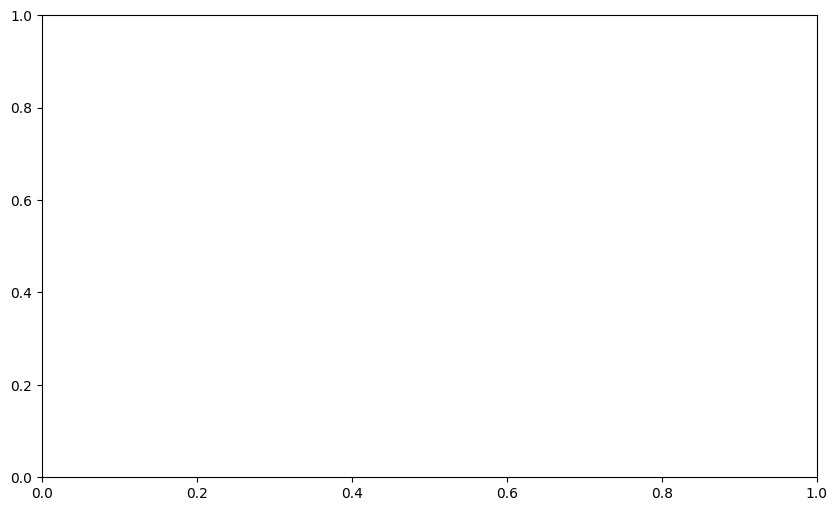

In [27]:

#Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) # Consider 3 nearest neighbors

# Train the classifier
knn.fit(X, y)


# Predict the category of the new point
predicted_category = knn.predict(np.array([home.latitude, home.longitude]).reshape(1, -1))
print(predicted_category)
# Visualize the data and prediction
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 0], c=[0, 0, 1, 2, 3, 3], cmap='viridis', s=100, label='Training Data')
plt.scatter(new_point[:, 1], new_point[:, 0], c='red', marker='x', s=200, label='New Point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KNN Classification on Map')
plt.legend()

# Annotate the new point with its predicted category
plt.annotate(f'Predicted: {predicted_category[0]}',
             xy=(new_point[:, 1], new_point[:, 0]),
             xytext=(new_point[:, 1] + 1, new_point[:, 0] + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)
plt.show()

print(f"The predicted category for the new point is: {predicted_category[0]}")


In [ ]:
#color icons
nyc_INJURED = folium.Map(location=[40.730610, -73.935242], tiles='Stamen Terrain', zoom_start=10)
folium.Marker([max_PEDESTRIANS_INJURED['LATITUDE'], max_PEDESTRIANS_INJURED['LONGITUDE']],
             icon=folium.Icon(color="red", icon="info-sign"),).add_to(nyc_INJURED)
folium.Marker([max_CYCLISTS_INJURED['LATITUDE'][82102], max_CYCLISTS_INJURED['LONGITUDE'][82102]],
             icon=folium.Icon(color="green", icon="flag"),).add_to(nyc_INJURED)
folium.Marker([max_CYCLISTS_INJURED['LATITUDE'][145777], max_CYCLISTS_INJURED['LONGITUDE'][145777]],
             icon=folium.Icon(color="green", icon="flag"),).add_to(nyc_INJURED)
folium.Marker([max_MOTORISTS_INJURED['LATITUDE'], max_MOTORISTS_INJURED['LONGITUDE']],
             icon=folium.Icon(color="blue", icon="star"),).add_to(nyc_INJURED)
nyc_INJURED


nyc_INJURED = folium.Map(location=[40.730610, -73.935242], tiles='Stamen Terrain', zoom_start=10)
folium.Marker([max_PEDESTRIANS_INJURED['LATITUDE'], max_PEDESTRIANS_INJURED['LONGITUDE']],
             icon=folium.Icon(color='red', prefix='fa',icon='male')).add_to(nyc_INJURED)
folium.Marker([max_CYCLISTS_INJURED['LATITUDE'][82102], max_CYCLISTS_INJURED['LONGITUDE'][82102]],
             icon=folium.Icon(color='green', prefix='fa',icon='bicycle')).add_to(nyc_INJURED)
folium.Marker([max_CYCLISTS_INJURED['LATITUDE'][145777], max_CYCLISTS_INJURED['LONGITUDE'][145777]],
             icon=folium.Icon(color='green', prefix='fa',icon='bicycle')).add_to(nyc_INJURED)
folium.Marker([max_MOTORISTS_INJURED['LATITUDE'], max_MOTORISTS_INJURED['LONGITUDE']],
             icon=folium.Icon(color='blue',prefix='fa',icon='car')).add_to(nyc_INJURED)
nyc_INJURED

let’s add folium.LatLngPopup() so we can get latitude/longitude information by clicking anywhere on the map.

MORE INFO
https://darigak.medium.com/your-guide-to-folium-markers-b9324fc7d65d

In [ ]:
print(k_means.cluster_centers_[1])

[ 42.4370998  -83.12131246]


SyntaxError: invalid syntax (<ipython-input-32-7fbbeaeb26f9>, line 1)